In [7]:
Fractal_Random_Motion
Jordan Heath

In [10]:
import numpy as np
import random as rand
import matplotlib.pyplot as plt
#import matplotlib as mpl
import time
#mpl.rcParams['figure.figsize'] = 8, 8


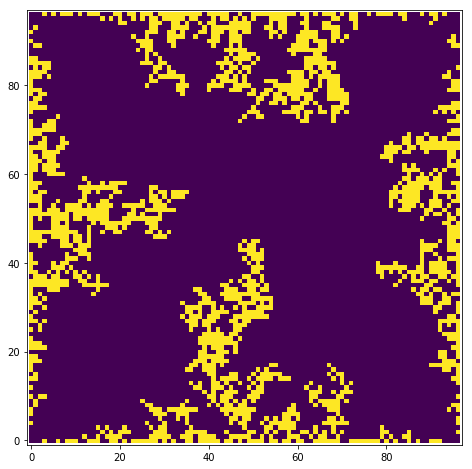

It took 13.45103645324707 seconds.


In [8]:
"""Simulating fractals using a random walk
and some sort of collision detection

I decided to try solving the problem using what I know about python,
next I will try to solve it using more numpy techniques

I started off using lists, but found using a set() increased my speed
considerably

I found that this is not the best way to create fractal patterns
but it was good experience to learn dealing with random motion and
plotting it. Next I will try the numpy array solution

I did find that this was decently quick, though. With 5,000 particles
it only takes around half a minute."""
#timer to compare speed with other techniques I tried
start = time.time()


def im_walkin_here(xy,step,markxy):
    """this function takes in my xy list, from the loop below,
    which is used as the coordinates for each movement of each
    'particle'. It indexs the last pieces of the xy list, 
    and the step value, to compute random movement.
    
    Once the random step is calculated it then tests to
    see if the new coordinates are contained within a set called
    markxy, if it is, the step before that one
    is used as the new final spot for the movement. This simulates
    stuff sticking together. However, due to this method I cannot
    change how "sticky" the surface is within some changes to the code.
    
    Markxy is a set of the last xy value from the previous run of the
    loop.
    I found that making markxy a set makes the script
    considerably faster.
    
    Markxy = set of final coordinates for each movement
    xy = each step of movement's coordinates
    step = the distance moved
    
    the try and except pieces are due to an
    indexing error I was getting once the list had reached
    the end
    
    The issue with this method is that it has zero stickiness.
    Stuff will only stop moving if there is a block in the location
    of its next step"""

    xyi = (xy[-1][0]+ rand.randrange(-step,step+1),
          xy[-1][1]+ rand.randrange(-step,step+1))
    moop = xy[-1]
    
    if moop in markxy:
        try:
            xy.append(xy[-2])
            return False
        except:
            xy.append(xyi)
            return True
    
    else:
        xy.append(xyi)
        return True
    
def bounding(xy):
    """this function created a bounding
    box for the movement. If the movement
    takes the particle outside the box, it
    stops this iteration of the loop from running,
    takes the final value, and starts a new iteration"""
    if xy[-1][0] >= 96:
        return False
    if xy[-1][0] <= 0:
        return False
    if xy[-1][1] <= 0:
        return False
    if xy[-1][1] >= 96:
        return False
    else:
        return True  

markxy = set([])

for i in range(2000):
    """This for loop controls how many particles
    I want to create and randomly walk.
    It contains a nested while loop, that while true
    will continue to move the particle. Whether it is true or false
    is determined by the borderPatrol function
    
    xy = starting point for walk
    step = distance moved each time"""
    
    xy = [(48,48)] 
    step = 1
    while bounding(xy):
        im_walkin_here(xy,step,markxy)
        if im_walkin_here(xy,step,markxy) == False:
            break
    markxy.add((xy[-1]))


"""I initially was plotting my set to visualize the random growth,
but instead decided to convert to an array to follow the same visualization format
as the class. Having my data in an array also makes it easier to count squares and 
numbers of points. 

Had I known that I would be using an array eventually, I would have started out with one, rather than using a set.
But my whole script runs very quickly (15 seconds with 2,000 points), so for such a small amount of data it didn't
seem efficient to try and eek out mere seconds"""
grid = np.zeros([97,97])
for i in list(markxy):
    """This for loop iterates through my set(converted into a list) of coordinates,
    it then uses the x and y coordinate to index the array of zeros from above. With
    that index it then turns the zero into a one. It is a simple way of turning a list
     of coordinates into an array
     
    The if pieces are due to an indexing error I was getting. My code above left a small hole through
    which a particle could travel, and every now and then an x or y are much greater than 100"""
    moop = i[0],i[1]
    if i[0] >= 97:
        moop = 96,i[1]
    if i[0] <= 0:
        moop = 0,i[1]
    if i[1] >= 97:
        moop = i[0],96
    if i[1] <= 0:
        moop = i[0],0
    
    grid[moop] = 1

    
plt.imshow(grid)
plt.ylim(-1,97,1)
plt.xlim(-1,97,1)
plt.show()



print ('It took', time.time()-start, 'seconds.')


1681 yellow blocks, and 7535 blue blocks
(1681, 7535, 759, 48)
(1681, 7535, 428, 32)
(1681, 7535, 279, 24)
(1681, 7535, 146, 16)
(1681, 7535, 95, 12)
(1681, 7535, 51, 8)
(1681, 7535, 32, 6)
(1681, 7535, 15, 4)
(1681, 7535, 9, 3)
(1681, 7535, 4, 2)
(1681, 7535, 1, 1)
[96, 48, 32, 24, 16, 12, 8, 6, 4, 3, 2, 1] [1681, 759, 428, 279, 146, 95, 51, 32, 15, 9, 4, 1]
my dimension and y intercept are:  
1.632 x + 0.3576


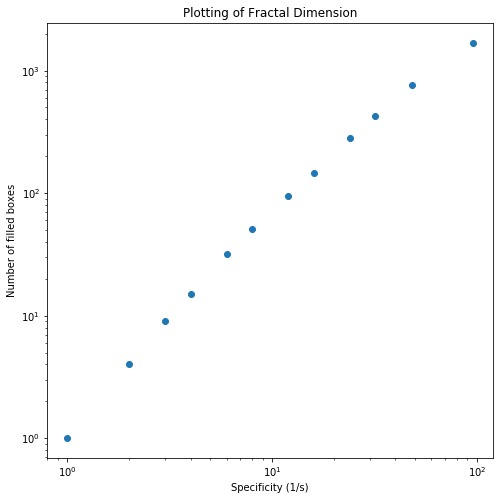

In [9]:
def dim_calc_grid(grid, lr, hr, dd, hd):
    """This function takes in the grid from above, and computes the amount of
    ones and zeroes within a square. The square size is based on the
    top top, bottom, left, and right boundings
    
    lr and hr determine the top to bottom bounding of the square
    
    dd and hd determine the left to right bounding of the square
    
    This function returns a total ones and zeros amount, which is
    used below for determining divisors. Since if you put the min and
    max of the entire array in as square boundings, your square size will
    be 1, and the values from that can be used to determine if any potential
    divisor is correct"""
    #lr,hr = 0,4 # top to bottom, in array
    #dd,hd = 4,8 # left to right, in array
    ones = 0
    zeros = 0
    for i in range(lr,hr):
        for k in range(dd,hd):
            if grid[i,k] == 1:
                ones += 1
            if grid[i,k] == 0:
                zeros += 1
    return ones,zeros
            #print(dimensiongrid[i,k])

a, b =dim_calc_grid(grid, 0, 96, 0, 96) ##running the above function with my entire grid size, to give the total
                                  ##count
print(a, "yellow blocks, and", b, "blue blocks")

def square_search(square,grid):
    """This function searches through the grid using a square. The size of the square needs to be entered when
    running the function, as well as the grid to be searched. Once the grid and square size are determined, it
    will manually search up and down, left and right through the grid - using the square as its framing.
    
    The function returns (1/2)a  total count of the ones and zeros, 
    
    
    in:
    square = size of square
    grid = grid to be searched
    
    out:
    ones = total count of 1's in grid
    zeros = total count of 0's in grid
    N = the amount of boxes that have 1s in them
    specificity = number of boxes (counted along 1 axis) example:
                specificity of 2 means on the x axis there are 2 boxes,
                and on the y axis there are 2 boxes - for a total of
                4 boxes. Which gives a count of 4 boxes with 1s in them
    
    """
    specificity = 0
    z = 0
    ones = 0
    zeros = 0
    N = 0
    for k in range(int(len(grid)/square)):
        r = 0
        for i in range(int(len(grid)/square)):
            a, b = dim_calc_grid(grid,0+r,square+r,0+z,square+z)
            if a >= 1:
                N += 1
            ones += a
            zeros += b
            r += square
        z += square
        specificity += 1
        
    return ones,zeros, N, specificity

N =[a] #starts with a, which is the count of boxes with 1s in them if each box is size 1
specificity = [len(grid)-1] #starts with 96 boxes along an axis, for this program. If
                            #I changed the size of the grid, the box count would change to.

for i in range(1,len(grid)):
    """
    this iterates through the length of the grid to find 
    the divisors of the total length. It does this by inserting the i value
    into my squareSerarch function, and compares it to the returned count from
    dimCalcGrid with 1 square the size of the whole grid.
    if their total counts are the same, i is considered a divisor and then it returns
    N and specificity for that value."""
    sqi = i
    k,a,d,b = square_search(sqi,grid)
    k1,a1 = dim_calc_grid(grid,0,96,0,96) 
    
    if k == k1:
        print(square_search(sqi,grid))  ##prints it out to make sure numbers look right
        specificity.append(b)
        N.append(d)
        
print(specificity,N)        

#Had trouble with this part, so using Paul's method for the plotting
#it takes in my specificity and N and finds there logs, then uses np.polyfit
#to spit out the slope of the line, which is also the dimension of my fractal
logx = np.log(specificity)
logy = np.log(N)
coeffs = np.polyfit(logx,logy,1)
poly = np.poly1d(coeffs)



print("my dimension and y intercept are:",poly)

plt.loglog(specificity,N,'o')
plt.ylabel("Number of filled boxes")
plt.xlabel("Specificity (1/s)")
plt.title("Plotting of Fractal Dimension")
plt.show()
